# Logistic Regression - Fav Color

In [1]:
import os,sys
import numpy as np
import pandas as pd
import pylab as plt
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sm_l
from statsmodels.formula.api import ols
from scipy import stats
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

src_dir = os.path.abspath(os.pardir)
sys.path[0] = src_dir

from analysis.CodingScoring import scoreTIPI, normTIPI
plt.style.use('dark_background')

src_dir

'/Users/melissawessel/Documents/dev/python/personality-stratification'

In [2]:
questions = pd.read_csv('../data/External/dataHeadings.csv')
dataRaw = pd.read_csv('../data/External/dataRaw.csv', names=questions.QuestionCode)
dataRaw.head()

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C+,S-,O+,E-,A+,C-,S+,O-,HonestyCheck,FreeText
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Agree strongly,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Yes,NaN
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Agree moderately,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Agree slightly,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN


In [3]:
df = dataRaw.join(normTIPI(scoreTIPI(dataRaw)))

In [5]:
df.head()

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C-,S+,O-,HonestyCheck,FreeText,O,C,E,A,S
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!,0.871115,-1.163156,0.347041,-0.578990,-0.242004
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!,0.432133,1.664499,0.662877,-0.578990,0.096085
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree slightly,Yes,NaN,-0.884811,-0.456242,0.031205,-0.986787,-0.242004
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...,-0.445830,0.957585,0.031205,-1.802382,1.110352
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN,-1.762774,-0.102785,-0.916303,0.644401,-0.242004


In [5]:
df.columns

Index(['Start Date', 'End Date', 'DressColor', 'DressColorOther',
       'DressShadow', 'DressShadowOther', 'DressLight', 'DressTrueColors',
       'DressTrueColorsOther', 'JacketColor', 'JacketColorOther',
       'JacketShadow', 'JacketLight', 'JacketLightDirection',
       'JacketTrueColors', 'FlopColor', 'FlopColorOther', 'FlopShadow',
       'FlopLight', 'FlopTrueColors', 'Age', 'Gender', 'Ethnicity',
       'Chronotype', 'ChronotypeOther', 'FavColor', 'VisDisorder', 'E+', 'A-',
       'C+', 'S-', 'O+', 'E-', 'A+', 'C-', 'S+', 'O-', 'HonestyCheck',
       'FreeText', 'O', 'C', 'E', 'A', 'S'],
      dtype='object')

In [6]:
df['FavColor'].str.lower().str.strip().value_counts().sort_values(ascending=False)

blue                                                                                                                                                                                                                                                     5056
green                                                                                                                                                                                                                                                    2952
purple                                                                                                                                                                                                                                                   1896
red                                                                                                                                                                                                                                           

In [4]:
# colors with over 500 responses
std_colors = ['blue','green','black','yellow','purple','red','orange','pink']

In [31]:
# practice

X, y = datasets.load_iris(return_X_y=True)
clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)
y_red = clf.predict(X[:2,:])

clf.predict_proba(X) 


clf.score(X, y)

0.9733333333333334

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
y_red

array([0, 0])

In [62]:
X[2:,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [29]:
df['FavColor'][df['FavColor'].str.lower().str.strip().isin(std_colors)]

0            Red
1         Green 
3           Blue
4         Yellow
6          Green
10        Green 
11          blue
12        Purple
13        Purple
15           Red
16         Blue 
17        purple
18        Purple
19           Red
20         Green
21          blue
24        purple
27        Black 
28          Blue
30         Green
31           red
32          Blue
34         Green
35          Blue
36         Green
37          Blue
38          Blue
39          Blue
41          Blue
42       Purple 
          ...   
17817        Red
17818       Blue
17820       Blue
17823     Purple
17826      green
17827       Blue
17828        red
17829      Black
17830      green
17831     Purple
17832      green
17833        Red
17835      green
17836     Purple
17837      Black
17838     Orange
17840      Green
17841      Black
17842      Blue 
17843       Blue
17844       Blue
17845      Green
17846       Blue
17847     Purple
17850       Blue
17851       blue
17852      Blue 
17853       Bl

In [30]:
12854/17857


0.7198297586380691

72% of the respondents are accounted for using the top 8 colors

In [5]:
df_color_OCEAN = df[['FavColor','O','C','E','A','S']][df['FavColor'].str.lower().str.strip().isin(std_colors)]

In [6]:
df_color_OCEAN['FavColor'] = df_color_OCEAN['FavColor'].str.lower().str.strip()

In [7]:
df_color_OCEAN['N'] = 0-df_color_OCEAN['S']
df_color_OCEAN = df_color_OCEAN.drop(columns='S')

In [8]:
df_color_OCEAN = df_color_OCEAN.dropna()

In [9]:
df_color_OCEAN

,FavColor,O,C,E,A,N
0,red,0.871115,-1.163156,0.347041,-0.578990,0.242004
1,green,0.432133,1.664499,0.662877,-0.578990,-0.096085
3,blue,-0.445830,0.957585,0.031205,-1.802382,-1.110352
4,yellow,-1.762774,-0.102785,-0.916303,0.644401,0.242004
5,pink,-1.323793,-0.809699,0.031205,-0.171193,-0.772263
6,green,1.310097,0.957585,0.031205,-0.986787,-0.434174
10,green,-0.445830,0.604128,-1.547975,1.867792,-1.448441
11,blue,-0.006848,0.957585,1.610385,-0.986787,-0.772263
12,purple,-0.884811,0.604128,1.294549,-1.802382,-0.772263
13,purple,0.432133,0.957585,0.978713,-0.171193,-0.096085


In [25]:
df_color_OCEAN['Black'] = 0

In [26]:
df_color_OCEAN['Black'][df_color_OCEAN['FavColor']=='black'] = 1

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
m = df_color_OCEAN.groupby(['Black']).mean()

In [28]:
# std_colors = ['blue','green','black','yellow','purple','red','orange','pink']
round(m * 100,0)

,O,C,E,A,N,Warmth
Black,,,,,,
0,-23.0,24.0,-22.0,10.0,-12.0,18.0
1,-16.0,10.0,-31.0,-23.0,8.0,0.0


In [31]:
df_color_OCEAN.head(20)

,FavColor,O,C,E,A,N,Warmth,Black
0,red,0.871115,-1.163156,0.347041,-0.578990,0.242004,1,0
1,green,0.432133,1.664499,0.662877,-0.578990,-0.096085,0,0
3,blue,-0.445830,0.957585,0.031205,-1.802382,-1.110352,0,0
4,yellow,-1.762774,-0.102785,-0.916303,0.644401,0.242004,1,0
5,pink,-1.323793,-0.809699,0.031205,-0.171193,-0.772263,0,0
6,green,1.310097,0.957585,0.031205,-0.986787,-0.434174,0,0
10,green,-0.445830,0.604128,-1.547975,1.867792,-1.448441,0,0
11,blue,-0.006848,0.957585,1.610385,-0.986787,-0.772263,0,0
12,purple,-0.884811,0.604128,1.294549,-1.802382,-0.772263,0,0
13,purple,0.432133,0.957585,0.978713,-0.171193,-0.096085,0,0


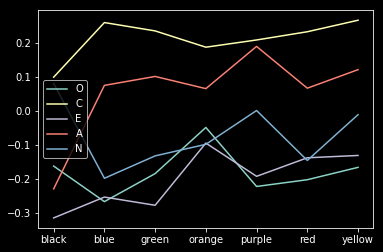

In [46]:
plt.plot(m)
plt.legend(['O','C','E','A','N'])

In [13]:
for i,color in enumerate(std_colors):
    df_color_OCEAN = df_color_OCEAN.replace(color,i)
    print(i)

0
1
2
3
4
5
6
7


In [19]:
df_color_OCEAN

,FavColor,O,C,E,A,N
0,5,0.871115,-1.163156,0.347041,-0.578990,0.242004
1,1,0.432133,1.664499,0.662877,-0.578990,-0.096085
3,0,-0.445830,0.957585,0.031205,-1.802382,-1.110352
4,3,-1.762774,-0.102785,-0.916303,0.644401,0.242004
5,7,-1.323793,-0.809699,0.031205,-0.171193,-0.772263
6,1,1.310097,0.957585,0.031205,-0.986787,-0.434174
10,1,-0.445830,0.604128,-1.547975,1.867792,-1.448441
11,0,-0.006848,0.957585,1.610385,-0.986787,-0.772263
12,4,-0.884811,0.604128,1.294549,-1.802382,-0.772263
13,4,0.432133,0.957585,0.978713,-0.171193,-0.096085


In [14]:
X = np.array(df_color_OCEAN[['O','C','E','A','N']])

In [15]:
X

array([[ 0.87111501, -1.16315566,  0.34704062, -0.57899029,  0.24200419],
       [ 0.43213345,  1.6644988 ,  0.66287663, -0.57899029, -0.09608493],
       [-0.44582968,  0.95758518,  0.0312046 , -1.80238153, -1.11035229],
       ...,
       [-0.00684811,  1.6644988 , -1.86381151,  0.64440095, -1.11035229],
       [-0.44582968, -0.45624205, -0.91630346, -0.17119321,  2.27053891],
       [-0.88481124, -0.45624205,  0.0312046 , -2.21017862,  1.25627155]])

In [80]:
# X = df_color_OCEAN['C'].values.reshape(-1,1)
# X

array([[-1.16315566],
       [ 1.6644988 ],
       [ 0.95758518],
       ...,
       [ 0.25067157],
       [ 1.6644988 ],
       [-0.45624205]])

In [16]:
y = np.array(df_color_OCEAN['FavColor'])
y

array([5, 1, 0, ..., 1, 4, 7])

In [17]:
# not working
clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X[400:], y[400:])
y_pred = clf.predict(X[:400])

# clf.predict_proba(X) 


clf.score(X[:400], y[:400])

0.3825

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
r2_score(y[:400],y_pred)

-0.7626144674178112

In [128]:
testN = 400
X_test = df_color_OCEAN[['O','C','E','A','N']].values[-1*testN:]
X_train = df_color_OCEAN[['O','C','E','A','N']].values[:-1*testN]

In [129]:
Y_test = df_color_OCEAN['FavColor'].values[-1*testN:]
Y_train = df_color_OCEAN['FavColor'].values[:-1*testN]

In [117]:
X_test = df_color_OCEAN[['O','C']].values[-1*testN:]
X_train = df_color_OCEAN[['O','C']].values[:-1*testN]

In [130]:
clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')

In [131]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [132]:
clf.score(X_test,Y_test)

0.305

In [133]:
r2_score(Y_test,Y_pred)

-1.1581714167912183

In [134]:
X_train

array([[ 0.87111501, -1.16315566,  0.34704062, -0.57899029,  0.24200419],
       [ 0.43213345,  1.6644988 ,  0.66287663, -0.57899029, -0.09608493],
       [-0.44582968,  0.95758518,  0.0312046 , -1.80238153, -1.11035229],
       ...,
       [-1.3237928 ,  1.31104199,  0.97871265,  0.23660387, -0.43417405],
       [ 0.43213345, -0.10278524,  1.29454867, -0.57899029,  1.25627155],
       [-0.00684811, -0.10278524, -0.28463142, -1.39458445,  1.25627155]])

In [135]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [139]:
Y_test

array([1, 6, 4, 5, 1, 0, 0, 4, 1, 1, 1, 4, 0, 0, 4, 1, 1, 5, 6, 3, 4, 3,
       5, 0, 0, 1, 0, 4, 4, 5, 1, 0, 1, 1, 4, 5, 4, 2, 0, 5, 5, 5, 4, 1,
       6, 0, 0, 1, 0, 2, 4, 0, 0, 6, 4, 2, 4, 0, 0, 1, 4, 0, 1, 4, 2, 4,
       1, 1, 4, 0, 0, 1, 4, 2, 4, 5, 0, 1, 5, 5, 2, 2, 4, 5, 4, 1, 1, 1,
       0, 3, 0, 4, 2, 5, 4, 0, 5, 0, 0, 4, 4, 4, 0, 0, 1, 0, 4, 5, 4, 6,
       4, 3, 1, 4, 5, 1, 0, 4, 2, 0, 1, 0, 1, 4, 0, 2, 0, 0, 4, 1, 0, 4,
       2, 6, 0, 5, 1, 4, 4, 1, 0, 4, 1, 0, 1, 0, 2, 4, 5, 4, 5, 0, 1, 5,
       1, 0, 4, 0, 5, 0, 1, 5, 4, 0, 1, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4,
       4, 0, 4, 1, 1, 2, 1, 0, 0, 1, 0, 1, 5, 4, 5, 1, 1, 0, 4, 0, 0, 1,
       4, 1, 0, 4, 0, 5, 0, 5, 1, 1, 4, 0, 1, 4, 2, 4, 0, 5, 4, 1, 0, 1,
       4, 4, 4, 0, 0, 4, 1, 1, 5, 2, 0, 5, 0, 1, 0, 0, 4, 4, 0, 0, 5, 0,
       4, 4, 4, 0, 0, 2, 3, 1, 0, 4, 0, 0, 2, 0, 1, 0, 0, 4, 0, 0, 1, 4,
       4, 2, 0, 1, 2, 1, 5, 0, 1, 1, 1, 4, 2, 3, 1, 0, 5, 1, 1, 4, 1, 3,
       0, 1, 4, 0, 0, 0, 1, 0, 5, 1, 0, 5, 0, 4, 0,

Maybe personality just truly doesn't predict favorite color? Trying regular statistical methods..

In [29]:
# std_colors = ['blue','green','black','yellow','purple','red','orange','pink']
for trait in ['N','E','O','A','C']:
    r = df_color_OCEAN[trait][df_color_OCEAN['FavColor']==5].dropna()
    o = df_color_OCEAN[trait][df_color_OCEAN['FavColor']==6].dropna()
    y = df_color_OCEAN[trait][df_color_OCEAN['FavColor']==3].dropna()
    g = df_color_OCEAN[trait][df_color_OCEAN['FavColor']==1].dropna()
    b = df_color_OCEAN[trait][df_color_OCEAN['FavColor']==0].dropna()
    bk = df_color_OCEAN[trait][df_color_OCEAN['FavColor']==2].dropna()
    p = df_color_OCEAN[trait][df_color_OCEAN['FavColor']==4].dropna()
    pk = df_color_OCEAN[trait][df_color_OCEAN['FavColor']==7].dropna()
    
    f_val, p_val = stats.f_oneway(r,o,y,g,b,bk,p,pk)
    print('F=%f, p=%f'%(f_val,p_val))

F=20.434863, p=0.000000
F=5.468164, p=0.000003
F=6.150761, p=0.000000
F=11.231668, p=0.000000
F=2.534130, p=0.013251


Neuroticism, extraversion, openness, agreeableness significantly different across favorite colors (but not a lot), neuroticism has the biggest effect

What if we reduce noise and just try to predict via personality if people like blue or black (opposites on strongest predictor traits)

In [50]:
X = np.array(df_color_OCEAN[['O','C','E','A','N']][df_color_OCEAN['FavColor'].isin([0,2])])
X

array([[-0.44582968,  0.95758518,  0.0312046 , -1.80238153, -1.11035229],
       [-0.00684811,  0.95758518,  1.61038469, -0.98678737, -0.77226317],
       [-0.44582968, -0.45624205, -0.91630346,  0.64440095,  0.58009331],
       ...,
       [ 0.43213345,  0.95758518, -1.86381151,  1.45999511, -0.09608493],
       [-2.20175593,  1.31104199, -1.23213947, -1.80238153, -1.11035229],
       [ 1.31009658,  1.31104199,  1.29454867,  0.23660387,  1.25627155]])

In [51]:
y = np.array(df_color_OCEAN['FavColor'][df_color_OCEAN['FavColor'].isin([0,2])])

In [52]:
y

array([0, 0, 0, ..., 0, 0, 2])

In [1]:
clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X[400:], y[400:])
y_pred = clf.predict(X[:400])

# clf.predict_proba(X) 


clf.score(X[:400], y[:400])

NameError: name 'linear_model' is not defined

In [54]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
np.set_printoptions(threshold=np.nan)

In [56]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
y

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

I don't know how to tell if it's not working because I'm doing something wrong or if it's not working because it's truly not predictive

## Logistic regression: Black preference 

In [32]:
df_color_OCEAN.head()

,FavColor,O,C,E,A,N,Warmth,Black
0,red,0.871115,-1.163156,0.347041,-0.578990,0.242004,1,0
1,green,0.432133,1.664499,0.662877,-0.578990,-0.096085,0,0
3,blue,-0.445830,0.957585,0.031205,-1.802382,-1.110352,0,0
4,yellow,-1.762774,-0.102785,-0.916303,0.644401,0.242004,1,0
5,pink,-1.323793,-0.809699,0.031205,-0.171193,-0.772263,0,0


In [33]:
y = df_color_OCEAN['Black'].values

In [35]:
X = df_color_OCEAN[['O','C','E','A','N']]

In [40]:
regr = sm_l.Logit(y,X).fit()
regr.summary()

Optimization terminated successfully.
         Current function value: 0.630616
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                12188
Model:                          Logit   Df Residuals:                    12183
Method:                           MLE   Df Model:                            4
Date:                Mon, 01 Apr 2019   Pseudo R-squ.:                  -2.374
Time:                        13:40:03   Log-Likelihood:                -7685.9
converged:                       True   LL-Null:                       -2277.9
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
O              0.3875      0.021     18.422      0.000       0.346       0.429
C             -0.4013      0.021    -19.433      0.000      -0.442      -0.361
E              0.2724      0.018     14.767      0.000       0.236       0.309
A             -0.2250      0.020    -11.197      0.000      -0.264      -0.186
N              0.1454      0.020      7.206      0.000       0.106       0.185
==============================================================================
"""

Rsquared is negative which implies that the model is worse than chance. Still not sure what's going wrong because each coefficient is significant?